# Weekly assignment 5.2: Polyline class

In this task you are practicing creating a class which requires some of the linear algebra

## Task 1

Design a class to represent the linearly interpolated function. The
object properties should be:

- 1-dim array of $ x $ points, always kept sorted
  ([here is a helpful function to achieve that](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argsort.html#numpy.argsort))  
- 1-dim array of $ y=f(x) $ points of the same size as x  
- label for the line  


First, implement object creator method (**init**) and print method
(**repr**). The initiator of the polyline should take three arguments:
vector of x, vector of y, and an optional label. Both Python lists and
NumPy arrays should be allowed as arguments.

Implement the function **len** to return the length of the line, that is
the number of its points.

Then, make the object callable by implementing **call** method. The call
should return the interpolated values of $ f(x) $ for the passed
array $ x $. The output should be the same shape as the input.
Use [scipy.interpolate.interp1d()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)
function, and return nan for extrapolated values (set bounds_error=False, fill_value=‘nan’).

Then, implement the + operation for polylines by writing **add**. The
addition should return a new polyline with combined points (remember to
keep them sorted).

Then, implement a plot() method for a polyline that should make a
picture of itself.

Finally, write a method intersect() for a polyline that would return the
set of intersection points of two polylines, using the theory below.

The tests in the end of this notebook should all pass.

### Finding the intersecting point of two line segments

Given two line segments in $ \mathbb{R}^2 $ with endpoint
coordinates as

$$
(x^1_1,y^1_1),(x^1_2,y^1_2) \text{  and  } (x^2_1,y^2_1),(x^2_2,y^2_2),
$$

where superscripts indicate the segment, subscripts indicate beginning
and end of the line, find whether the segments intersect, and if so,
what is the intersection point.

Let intersection be given by $ (x_0,y_0) $, and introduce two more
variables $ t_1 $ and $ t_2 $ that equal to the distance from
the starting points $ (x^1_1,y^1_1) $ and $ (x^2_1,y^2_1) $ to
the intersection point, relative to the corresponding segment lengths.
Then we can write the following system of equations

$$
\begin{eqnarray*}
(x^1_2 - x^1_1) \cdot t_1 &=& x_0 - x^1_1 \\
(x^2_2 - x^2_1) \cdot t_2 &=& x_0 - x^2_1 \\
(y^1_2 - y^1_1) \cdot t_1 &=& y_0 - y^1_1 \\
(y^2_2 - y^2_1) \cdot t_2 &=& y_0 - y^2_1 \\
\end{eqnarray*}
$$

In matrix notation $ Az=b $ where

$$
A=
\begin{pmatrix}
x^1_2 - x^1_1 & 0 & -1 & 0 \\
0 & x^2_2 - x^2_1 & -1 & 0 \\
y^1_2 - y^1_1 & 0 & 0 & -1 \\
0 & y^2_2 - y^2_1 & 0 & -1 \\
\end{pmatrix},\;\;
b=\begin{pmatrix}
-x^1_1\\
-x^2_1\\
-y^1_1\\
-y^2_1\\
\end{pmatrix},\;\;
z=(t_1,t_2,x_0,y_0)
$$

Then if solution exists, compute, check $ t_1 $ and $ t_2 $ - If
both belong to $ [0,1] $, the intersection point exists and is given
by the computed $ (x_0,y_0) $ - Otherwise, it the segments do not
intersect

In [ ]:
# Starter code
import numpy as np

class polyline():
    '''Class that implements the linearly interpolated function'''

    def __repr__(self):
        '''Print for polylines'''
        return self.__str__(self)

    def __str__(self):
        '''String representation for polylines'''
        return 'Polyline "%s" with x=%s, y=%s' % (self.label,self.x,self.y)

    # Write your code here

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

class polyline():
    '''Class that implements the linearly interpolated function'''

    def __repr__(self):
        '''Print for polylines'''
        return self.__str__(self)

    def __str__(self):
        '''String representation for polylines'''
        return 'Polyline "%s" with x=%s, y=%s' % (self.label,self.x,self.y)

    def __init__(self,x,y,label='no name'):
        '''Constructor for polyline class'''

        # x,y input check
        def array_check(v):
            if isinstance(v,list):
                return np.array(v)
            elif isinstance(v,np.ndarray):
                return v
            else:
                raise TypeError('Wrong type for input array')
        # check x and y
        x = array_check(x)
        y = array_check(y)
        # in case multidim array is passed, reshape and squeeze to get 1-dim
        x = x.reshape(x.size)
        y = y.reshape(y.size)
        # finally
        if x.size != y.size:
            raise ValueError('x and y should be the same size')
        # check label
        if not isinstance(label,str):
            raise TypeError('Label shoud be string')
        # sort points
        i = np.argsort(x)
        x = x[i]
        y = y[i]
        # save arguments as object properties
        self.x = x
        self.y = y
        self.label = label

    def __len__(self):
        '''Returns the length of polyline'''
        return self.x.size

    def __call__(self,x):
        '''Interpolation of the polyline'''
        interp = interpolate.interp1d(self.x,self.y,kind='linear', \
                                      copy=False,assume_sorted=True, \
                                       bounds_error=False, fill_value='nan')
        return interp(x)

    def __add__(self,other):
        '''Add two polylines by combining the points'''
        if isinstance(other,polyline):
            # allocate space for new polyline points
            x=np.empty(len(self)+len(other))
            y=np.empty(len(self)+len(other))
            # compbine
            x[:len(self)] = self.x.copy()
            x[len(self):] = other.x.copy()
            y[:len(self)] = self.y.copy()
            y[len(self):] = other.y.copy()
            # sort
            i = np.argsort(x)
            x = x[i]
            y = y[i]
            # label
            l = self.label + '+' + other.label
            # create the result
            return polyline(x,y,l)
        else:
            raise TypeError('Only polyline can be added to a polyline')

    def plot(self, **kvargs):
        '''Plot of the line'''
        plt.plot(self.x,self.y,label=self.label)
        return

    def intersect(self,other):
        '''Finds all intersection points of two polylines'''
        intersections=[]
        if isinstance(other,polyline):
            for i in range(len(self)-1):
                for j in range(len(other)-1):
                    # check if segments i and j intersect
                    intr = self.__intersect_segments(self.x[i],self.y[i],
                                                     self.x[i+1],self.y[i+1],
                                                     other.x[j],other.y[j],
                                                     other.x[j+1],other.y[j+1])
                    if intr:
                        intersections.append(list(intr))
            return np.array(intersections)
        else:
            raise TypeError('Only polyline can be intersected')

    def __intersect_segments(self,*arg):
        '''Find intersection of two line segments given by 4 (x,y) points'''
        # unpack parameters
        x11,y11,x12,y12=arg[:4] #first line segment
        x21,y21,x22,y22=arg[4:] #second line segment
        # bounding box check: whether intersection is possible in principle
        bb = ( min(x11,x12)<max(x21,x22) and min(x21,x22)<max(x11,x12) and
               min(y11,y12)<max(y21,y22) and min(y21,y22)<max(y11,y12) )
        if not bb:
            return None
        # form system of equations
        A = np.array([[x12-x11,0,-1,0],[0,x22-x21,-1,0],[y12-y11,0,0,-1],[0,y22-y21,0,-1]])
        b = np.array([-x11,-x21,-y11,-y21])
        t1,t2,x0,y0 = np.linalg.solve(A,b)
        if 0 <= t1 <= 1 and 0 <= t2 <= 1:
            return x0,y0
        else:
            return None

## Unit tests

In [2]:
# Test the code above

a=polyline([1,4],[1,1],label='test')
s='%s'%a
if s=='Polyline "test" with x=[1 4], y=[1 1]':
    print('Test 1 passed')
else:
    print('Test 1 FAIL: %s' % s)

a=polyline(np.array([1,4]),np.array([1,1]),'array')
s='%s'%a
if s=='Polyline "array" with x=[1 4], y=[1 1]':
    print('Test 2 passed')
else:
    print('Test 2 FAIL: %s' % s)

a=polyline([[1,4],[2,0]],[[1,1],[3,9]])
s='%s'%a
if s=='Polyline "no name" with x=[0 1 2 4], y=[9 1 3 1]':
    print('Test 3 passed')
else:
    print('Test 3 FAIL: %s' % s)

try:
    a=polyline(2,5)
except TypeError:
    print('Test 4 passed')
except:
    print('Test 4 FAIL')
else:
    print('Test 4 FAIL')

try:
    a=polyline([1,4,2,0],[1,1,3])
except ValueError:
    print('Test 5 passed')
except:
    print('Test 5 FAIL')
else:
    print('Test 5 FAIL')

try:
    a=polyline([2],[5],0)
except TypeError:
    print('Test 6 passed')
except:
    print('Test 6 FAIL')
else:
    print('Test 6 FAIL')

try:
    a=polyline([2],[5]) + 5
except TypeError:
    print('Test 7 passed')
except:
    print('Test 7 FAIL')
else:
    print('Test 7 FAIL')

a=polyline([1,4],[1,1],label='test1')+polyline([2,5],[4,7],label='test2')
s='%s'%a
if s=='Polyline "test1+test2" with x=[1. 2. 4. 5.], y=[1. 4. 1. 7.]':
    print('Test 8 passed')
else:
    print('Test 8 FAIL: %s' % s)

a=polyline(np.array([1,4,5,6,7]),np.array([1,1,4,3,2]))
s='length is %d' % len(a)
if s=='length is 5':
    print('Test 9 passed')
else:
    print('Test 9 FAIL: %s' % s)

a=polyline(np.array([1,4,5,6,7]),np.array([1,1,4,3,2]))
x=[[1.2,3.4,5.4,4.3,8.1],[1.3,4.3,4.5,3.4,0.2]]
y=a(x)
try:
    y1=y[np.logical_not(np.isnan(y))]
    flag=all(np.isnan(y[[0,1],[4,4]]))
    s='interpolation %s'%y1
    if flag and s == 'interpolation [1.  1.  3.6 1.9 1.  1.9 2.5 1. ]':
        print('Test 10 passed')
    else:
        print('Test 9 FAIL: %s' % s)
except:
    print('Test 10 FAIL with an error')

Test 1 passed
Test 2 passed
Test 3 passed
Test 4 passed
Test 5 passed
Test 6 passed
Test 7 passed
Test 8 passed
Test 9 passed
Test 10 passed


## Graphical test

The correctness of calculated intersection points is easiest to check
with a **picture**

Intersection points 6


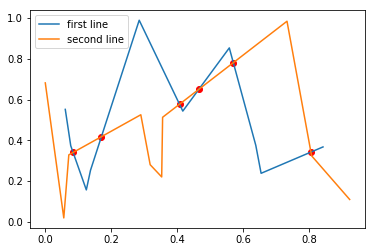

In [14]:
# Graphical test
N=10
p1 = polyline(np.random.rand(N),np.random.rand(N),'first line')
p2 = polyline(np.random.rand(N),np.random.rand(N),'second line')
intrs=p1.intersect(p2)

p1.plot()
p2.plot()
if intrs.size>0:
    plt.scatter(x=intrs[:,0],y=intrs[:,1],c='red')
    print('Intersection points', intrs.size//2)
plt.legend()
plt.show()